# Weibo-COV network actor analysis

## load the data

In [1]:
import pandas as pd
import os

# file path
file_paths = {
    "201912": "C:\\Users\\win10\\Desktop\\COV-Weibo2.0\\2019-12.csv",
    "202001": "C:\\Users\\win10\\Desktop\\COV-Weibo2.0\\2020-01.csv",
    "202002": "C:\\Users\\win10\\Desktop\\COV-Weibo2.0\\2020-02.csv",
    "202003": "C:\\Users\\win10\\Desktop\\COV-Weibo2.0\\2020-03.csv",
    "202004": "C:\\Users\\win10\\Desktop\\COV-Weibo2.0\\2020-04.csv",
    "202005": "C:\\Users\\win10\\Desktop\\COV-Weibo2.0\\2020-05.csv",
    "202006": "C:\\Users\\win10\\Desktop\\COV-Weibo2.0\\2020-06.csv",
    "202007": "C:\\Users\\win10\\Desktop\\COV-Weibo2.0\\2020-07.csv",
    "202008": "C:\\Users\\win10\\Desktop\\COV-Weibo2.0\\2020-08.csv",
    "202009": "C:\\Users\\win10\\Desktop\\COV-Weibo2.0\\2020-09.csv",
    "202010": "C:\\Users\\win10\\Desktop\\COV-Weibo2.0\\2020-10.csv",
    "202011": "C:\\Users\\win10\\Desktop\\COV-Weibo2.0\\2020-11.csv",
    "202012": "C:\\Users\\win10\\Desktop\\COV-Weibo2.0\\2020-12.csv"
}


all_data = pd.DataFrame()

# read and combine
for month, file_path in file_paths.items():
    if os.path.exists(file_path):  
        monthly_data = pd.read_csv(file_path)
        monthly_data['month'] = month 
        all_data = pd.concat([all_data, monthly_data], ignore_index=True)
    else:
        print(f"file {file_path} error")


print(all_data.head())


         _id           user_id  crawl_time           created_at  like_num  \
0  IiF63fYO0  4fcbad79e90c801a  1590386786  2019-12-01 00:03:10         0   
1  IiF6Dkep6  54eef1e0487e6985  1590672442  2019-12-01 00:04:37         0   
2  IiF84inVj  d5b2a53868fba234  1587964711  2019-12-01 00:08:09         0   
3  IiF8eCe2f  8ccc97455ba077b8  1587983525  2019-12-01 00:08:33         0   
4  IiF8j4W4v  071b2af605edaa0a  1590375517  2019-12-01 00:08:44         0   

   repost_num  comment_num                                            content  \
0           0            0  #宝妈咨询[超话]# 有朋友私下咨询：成人感冒咳嗽，咽痛咳嗽三天，医生开了这4个药，你觉得有...   
1           0            0  #高以翔去世##健康中国2030#    当一个心脏承担着两个生命～从心源性猝死说妊娠期心脏...   
2           0            0  央视新闻频道，正在播出宇芽家暴的专题采访。  这个专题之前是高以翔事件的报道。 转发理由:看...   
3           0            0  【中国轴承与德国轴承的差别】 1、轴承的精度 国产的轴承的尺寸偏差和旋转精度虽然和进口轴承已...   
4           0            0  大部分人只想活的光鲜，却从来没想过活的足够久。  这个世界上的大部分人，都没有周期概念，大部...   

  origin_weibo geo_info   month  
0    IiECM54lL  

In [16]:
import networkx as nx



# calculate the degree
node_degrees = G.degree()

# sort
sorted_nodes_by_degree = sorted(node_degrees, key=lambda x: x[1], reverse=True)

# key nodes selection(top 50)
key_nodes = sorted_nodes_by_degree[:50]


import pandas as pd

key_nodes_df = pd.DataFrame(key_nodes, columns=['user_id', 'degree'])

print(key_nodes_df)



      user_id  degree
0   IBFuPrwSM  782000
1   Ir9mydRpM  282451
2   JxytuBGvX  198424
3   IsizhBjTy  194762
4   IqLAOtwIF  163633
5   IrCDH0SUn  158064
6   IqFccfq2k  155240
7   IBJqp96I8  139111
8   ICS4bqgKP  134931
9   IsNq8eiI5  108957
10  IBwtbg610   98863
11  IEXcv9Lom   77420
12  IxDCOwiwQ   75879
13  Is9M7taaY   71689
14  ID0NVFmd5   60608
15  Is0XboARR   58941
16  Ja5siDU14   56707
17  JdtY4mo8F   54207
18  IqvflzAyo   54161
19  JjCOY71EV   49751
20  JkzoxE7eQ   46623
21  Iwk0c35Co   45840
22  IBIrTAwra   45031
23  Islraim0Q   44725
24  JleWb8aFV   42714
25  IzEkLs2oR   42007
26  JmpqMnoFr   41495
27  ICvm1CFL9   41248
28  JvgsLEf9E   39736
29  JjDOGnbVL   39514
30  JnjugksBd   39242
31  Ivzz2nWhZ   39233
32  Jlw1mqfOM   38781
33  JopW1v2Cr   36222
34  J01SMgPdf   35414
35  Jlb2I6ihM   35069
36  IsIhe0PZm   34660
37  IucyW9Dcp   34531
38  IqYW7aMHd   34255
39  JB0k08n8t   33208
40  IszpzarMe   32540
41  Iz0xxcf6o   32169
42  Jlc3kv0Fi   31742
43  J06ae5NZM   31074
44  JAZQEz

## network analysis - subgraph sampling

In [3]:
# extract data for following network
all_data_renetwork = all_data.iloc[:, [0,1,-4]]
print(all_data_renetwork.head())

         _id           user_id origin_weibo
0  IiF63fYO0  4fcbad79e90c801a    IiECM54lL
1  IiF6Dkep6  54eef1e0487e6985    Iiag1thbd
2  IiF84inVj  d5b2a53868fba234    IiEBvb90s
3  IiF8eCe2f  8ccc97455ba077b8    IiEtFEJcd
4  IiF8j4W4v  071b2af605edaa0a    IiED7nRYH


In [5]:
import pandas as pd
import networkx as nx

df = all_data_renetwork
G = nx.DiGraph()
G.add_nodes_from(df.user_id.unique())

# edge weight
edges = df.groupby(['origin_weibo', 'user_id']).size()


for (origin, user), weight in edges.items():
    G.add_edge(origin, user, weight=weight)


In [29]:
import networkx as nx
import random



# key nodes set
seed_nodes = key_nodes_df['user_id'].tolist()  
personalization = {node: 1 if node in seed_nodes else 0 for node in G.nodes()}
ppr_scores = nx.pagerank(G, personalization=personalization, alpha=0.85)
important_nodes = sorted(ppr_scores, key=ppr_scores.get, reverse=True)[:1000]

def perform_random_walk_with_neighbors(G, start_nodes, num_steps=10):
    visited_nodes = set(start_nodes)  
    for start_node in start_nodes:
        if start_node in G:
            current_node = start_node
            for _ in range(num_steps):
                neighbors = list(G.neighbors(current_node))
                if neighbors:  # make sure it has neighbors
                    next_node = random.choice(neighbors)
                    visited_nodes.add(next_node)  # record the visited nodes
                    visited_nodes.update(G.neighbors(next_node))  # contain the neighbors
                    current_node = next_node  # move to the next node
                else:
                    break  # if there's no neighbors, then end
    return visited_nodes

# use revised function for random walk
visited_nodes_with_neighbors = perform_random_walk_with_neighbors(G, important_nodes, num_steps=20)

# created sampled subgraph
sampled_subgraph_with_neighbors = G.subgraph(visited_nodes_with_neighbors).copy()


print(f"采样子图的节点数: {sampled_subgraph_with_neighbors.number_of_nodes()}")
print(f"采样子图的边数: {sampled_subgraph_with_neighbors.number_of_edges()}")


采样子图的节点数: 1050
采样子图的边数: 425


In [9]:
print(f"原图的节点数: {G.number_of_nodes()}")
print(f"原图的边数: {G.number_of_edges()}")

原图的节点数: 14544632
原图的边数: 49456228


In [22]:
import networkx as nx
from sklearn.cluster import KMeans
from scipy.linalg import eigh
import numpy as np

# sampled_subgraph = sampled_subgraph_with_neighbors

sampled_subgraph = sampled_subgraph_with_neighbors.to_undirected()



# calculate laplace matrix
L = nx.laplacian_matrix(sampled_subgraph).astype(float)

# 特征值分解拉普拉斯矩阵
eigenvalues, eigenvectors = eigh(L.toarray())

# 选择前k个最小的非零特征值对应的特征向量
k = 40  
vectors = eigenvectors[:, np.argsort(eigenvalues)[1:k+1]]

# K-means clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(vectors)

labels = kmeans.labels_


for i, node in enumerate(sampled_subgraph.nodes()):
    sampled_subgraph.nodes[node]['community'] = labels[i]



C:\Users\win10\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\win10\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


### very first visualization

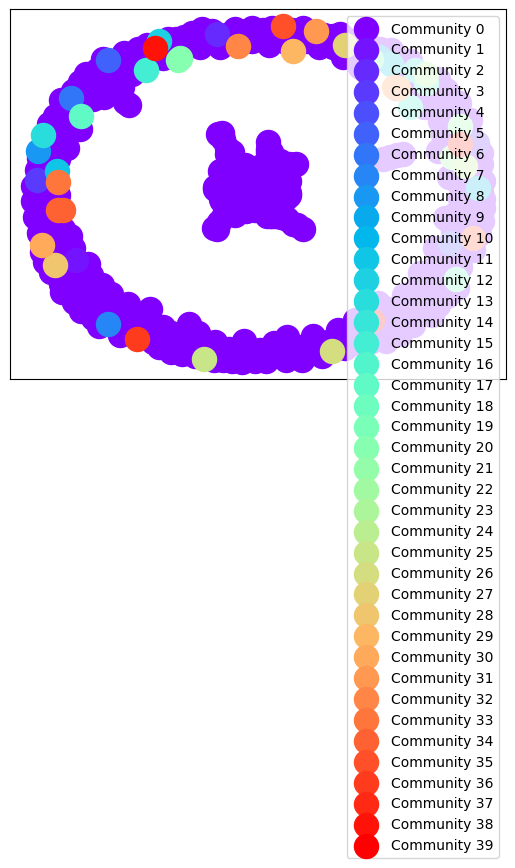

In [23]:
import matplotlib.pyplot as plt
import networkx as nx


community_labels = set(nx.get_node_attributes(sampled_subgraph, 'community').values())
colors = plt.cm.rainbow(np.linspace(0, 1, len(community_labels)))
community_color_map = dict(zip(community_labels, colors))


pos = nx.spring_layout(sampled_subgraph)  
for community, color in community_color_map.items():
    nx.draw_networkx_nodes(sampled_subgraph, pos, 
                           nodelist=[n for n in sampled_subgraph if sampled_subgraph.nodes[n]['community'] == community],
                           node_color=[color],
                           label=f"Community {community}")
nx.draw_networkx_edges(sampled_subgraph, pos, alpha=0.5)
plt.legend(scatterpoints=1)
plt.show()


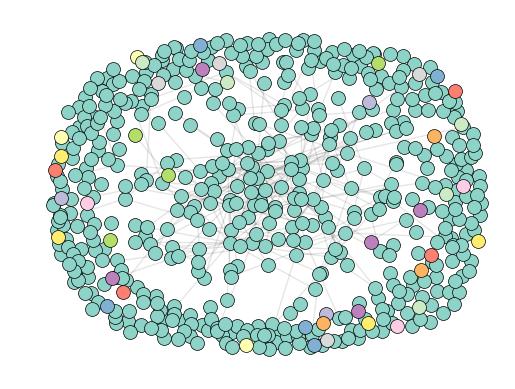

In [27]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np


community_labels = set(nx.get_node_attributes(sampled_subgraph, 'community').values())
colors = plt.cm.Set3(np.linspace(0, 1, len(community_labels)))
community_color_map = dict(zip(community_labels, colors))

# spring-layout
pos = nx.spring_layout(sampled_subgraph, k=0.15, iterations=20)


for community, color in community_color_map.items():
    nx.draw_networkx_nodes(
        sampled_subgraph,
        pos,
        nodelist=[n for n in sampled_subgraph if sampled_subgraph.nodes[n]['community'] == community],
        node_color=[color],
        node_size=100, 
        edgecolors='black',
        linewidths=0.5  
    )


edges = sampled_subgraph.edges()
nx.draw_networkx_edges(
    sampled_subgraph,
    pos,
    edgelist=edges,
    alpha=0.1 
)

plt.axis('off') 
plt.show()


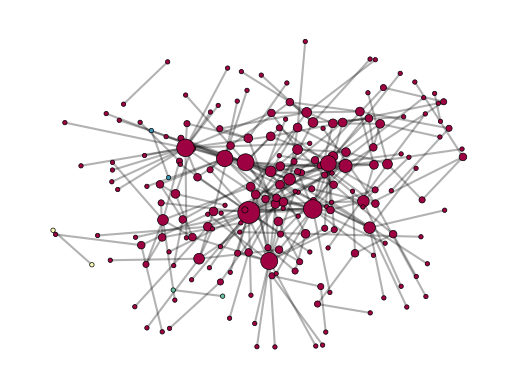

In [28]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np


community_labels = set(nx.get_node_attributes(sampled_subgraph, 'community').values())

colors = plt.cm.Spectral(np.linspace(0, 1, len(community_labels)))
community_color_map = dict(zip(community_labels, colors))


pos = nx.spring_layout(sampled_subgraph, k=0.3, iterations=50)


node_sizes = [sampled_subgraph.nodes[n]['degree'] * 10 for n in sampled_subgraph.nodes()]
nx.draw_networkx_nodes(
    sampled_subgraph,
    pos,
    node_color=[community_color_map[sampled_subgraph.nodes[n]['community']] for n in sampled_subgraph.nodes()],
    node_size=node_sizes,
    edgecolors='black', 
    linewidths=0.5,
)


community_edges = [(u, v) for u, v in sampled_subgraph.edges() if sampled_subgraph.nodes[u]['community'] == sampled_subgraph.nodes[v]['community']]
nx.draw_networkx_edges(
    sampled_subgraph,
    pos,
    edgelist=community_edges,
    alpha=0.3,
    width=1.5
)


inter_community_edges = [(u, v) for u, v in sampled_subgraph.edges() if sampled_subgraph.nodes[u]['community'] != sampled_subgraph.nodes[v]['community']]
nx.draw_networkx_edges(
    sampled_subgraph,
    pos,
    edgelist=inter_community_edges,
    alpha=0.1,
    width=0.5,
    edge_color="silver"
)

plt.axis('off')  
plt.show()


## modification

### iteration: sample size

In [31]:
import networkx as nx
import random




seed_nodes = key_nodes_df['user_id'].tolist()  
personalization = {node: 1 if node in seed_nodes else 0 for node in G.nodes()}
ppr_scores = nx.pagerank(G, personalization=personalization, alpha=0.85)
important_nodes = sorted(ppr_scores, key=ppr_scores.get, reverse=True)[:100000]

def perform_random_walk_with_neighbors(G, start_nodes, num_steps=10):
    visited_nodes = set(start_nodes)  
    for start_node in start_nodes:
        if start_node in G:
            current_node = start_node
            for _ in range(num_steps):
                neighbors = list(G.neighbors(current_node))
                if neighbors:  
                    next_node = random.choice(neighbors)
                    visited_nodes.add(next_node) 
                    visited_nodes.update(G.neighbors(next_node))  
                    current_node = next_node  
                else:
                    break  
    return visited_nodes


visited_nodes_with_neighbors = perform_random_walk_with_neighbors(G, important_nodes, num_steps=20)

sampled_subgraph_with_neighbors = G.subgraph(visited_nodes_with_neighbors).copy()

print(f"采样子图的节点数: {sampled_subgraph_with_neighbors.number_of_nodes()}")
print(f"采样子图的边数: {sampled_subgraph_with_neighbors.number_of_edges()}")

采样子图的节点数: 100050
采样子图的边数: 41031


### iteration2: improve the algorithm(use the random walk with jumping step)

In [79]:
import networkx as nx
import random



# seed nodes
seed_nodes = key_nodes_df['user_id'].tolist()  
personalization = {node: 1 if node in seed_nodes else 0 for node in G.nodes()}
ppr_scores = nx.pagerank(G, personalization=personalization, alpha=0.85)
important_nodes = sorted(ppr_scores, key=ppr_scores.get, reverse=True)[:100000]

def perform_random_walk_with_jumps(G, start_nodes, num_steps=10, jump_prob=0.05):
    visited_nodes = set(start_nodes)
    all_nodes = list(G.nodes())  
    for start_node in start_nodes:
        if start_node in G:
            current_node = start_node
            for _ in range(num_steps):
                # jump with certain prob
                if random.random() < jump_prob:
                    current_node = random.choice(all_nodes)  # select a node from the whole graph randomly
                else:
                    neighbors = list(G.neighbors(current_node))
                    if neighbors:
                        # we can choose the next node according to the edge weight(if there is one)
                        # eg: weights = [G[current_node][nbr].get('weight', 1) for nbr in neighbors]
                        # next_node = random.choices(neighbors, weights=weights)[0]
                        next_node = random.choice(neighbors)
                        visited_nodes.add(next_node)
                        visited_nodes.update(G.neighbors(next_node))
                        current_node = next_node
                    else:
                        break
    return visited_nodes

# use the new algorithm
visited_nodes_with_jumps = perform_random_walk_with_jumps(G, important_nodes, num_steps=20, jump_prob=0.05)

# create subgraph
sampled_subgraph_with_jumps = G.subgraph(visited_nodes_with_jumps).copy()

# print
print(f"采样子图的节点数: {sampled_subgraph_with_jumps.number_of_nodes()}")
print(f"采样子图的边数: {sampled_subgraph_with_jumps.number_of_edges()}")


采样子图的节点数: 100846
采样子图的边数: 41324


### iteration3: use the sparce matrix 

In [81]:
import networkx as nx
from sklearn.cluster import KMeans
from scipy.sparse.linalg import eigsh  
import numpy as np


sampled_subgraph = sampled_subgraph_with_jumps.to_undirected()


L = nx.laplacian_matrix(sampled_subgraph).astype(float)

# Decompose the Laplace matrix using the sparse matrix method eigenvalue decomposition, computing only the smallest k+1 eigenvalues and eigenvectors
# Note: we compute the k+1 eigenvalues because the smallest eigenvalue of the Laplace matrix is 0, which corresponds to the global constant eigenvector
k = 40  # k = the number of clusters
eigenvalues, eigenvectors = eigsh(L, k=k+1, which='SM')

vectors = eigenvectors[:, np.argsort(eigenvalues)[1:k+1]]

# k-means clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(vectors)

# cluster results
labels = kmeans.labels_


for i, node in enumerate(sampled_subgraph.nodes()):
    sampled_subgraph.nodes[node]['community'] = labels[i]

# every node is allocated to one community tag


C:\Users\win10\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## community detection

In [83]:
import networkx as nx
from community import community_louvain


# Calculate the degree of each node and add it as an attribute to the node
degrees = dict(sampled_subgraph.degree())
nx.set_node_attributes(sampled_subgraph, degrees, 'degree')




### visualization(with 3 layouts)

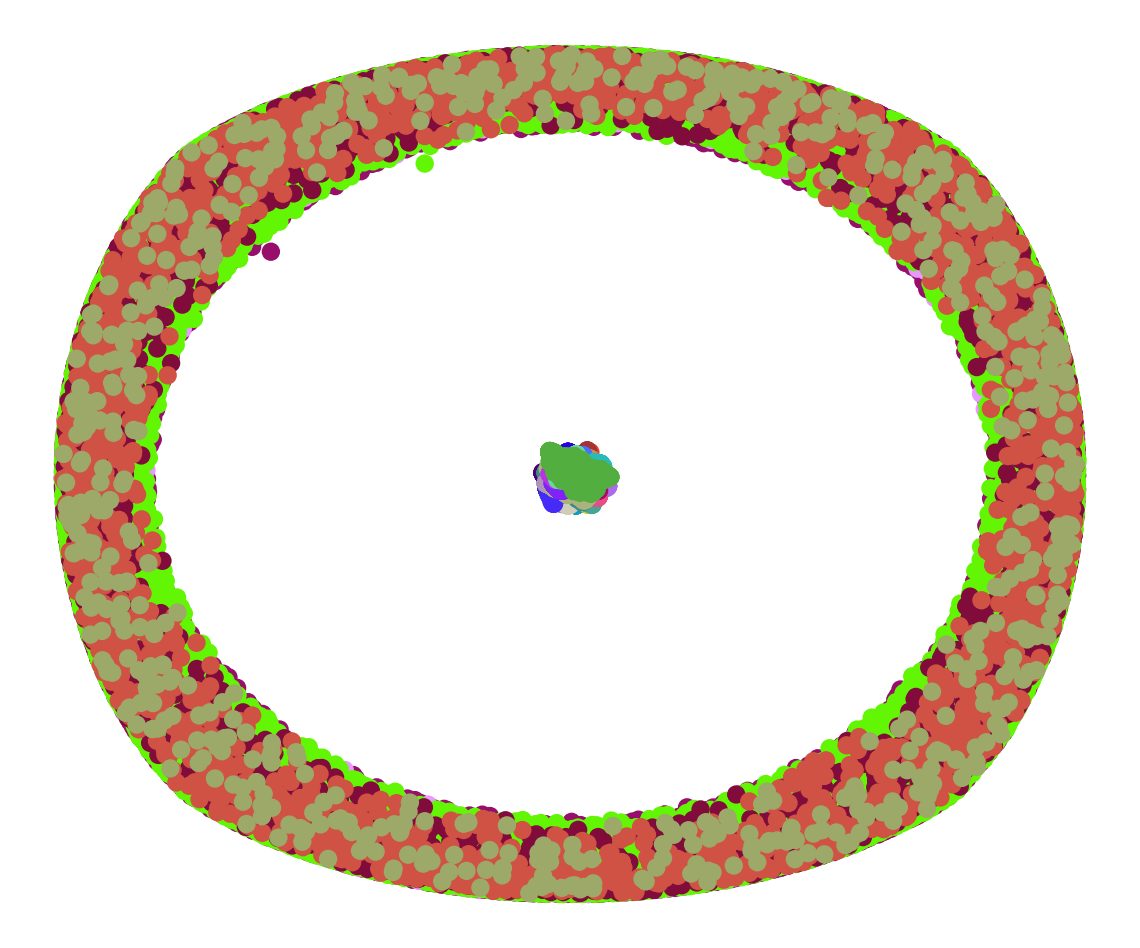

In [84]:
import matplotlib.pyplot as plt
import networkx as nx
import random


plt.figure(figsize=(12, 10), dpi=120)

pos = nx.spring_layout(sampled_subgraph)


community_color_map = {c: ('#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])) for c in set(nx.get_node_attributes(sampled_subgraph, 'community').values())}


for community, color in community_color_map.items():
    community_nodes = [node for node in sampled_subgraph if sampled_subgraph.nodes[node]['community'] == community]
    node_sizes = [sampled_subgraph.nodes[node].get('size', 100) for node in community_nodes]
    nx.draw_networkx_nodes(sampled_subgraph, pos, nodelist=community_nodes, node_color=color, node_size=node_sizes)


community_edges = [(u, v) for u, v in sampled_subgraph.edges() if sampled_subgraph.nodes[u]['community'] == sampled_subgraph.nodes[v]['community']]
nx.draw_networkx_edges(sampled_subgraph, pos, edgelist=community_edges, edge_color='gray')

non_community_edges = [(u, v) for u, v in sampled_subgraph.edges() if sampled_subgraph.nodes[u]['community'] != sampled_subgraph.nodes[v]['community']]
nx.draw_networkx_edges(sampled_subgraph, pos, edgelist=non_community_edges, edge_color='lightgray', style='dashed')

# demonstrate
plt.axis('off')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.cm as cm
from matplotlib.colors import Normalize


# multipartite_layout
fig, ax = plt.subplots(figsize=(12, 10), dpi=120)


pos = nx.layout.multipartite_layout(sampled_subgraph, subset_key='community')


communities = nx.get_node_attributes(sampled_subgraph, 'community')
vmin = min(communities.values())
vmax = max(communities.values())
norm = Normalize(vmin=vmin, vmax=vmax)
cmap = cm.get_cmap('viridis', len(set(communities.values())))


node_colors = [cmap(norm(communities[node])) for node in sampled_subgraph]
nx.draw_networkx_nodes(sampled_subgraph, pos, node_color=node_colors, node_size=100, alpha=0.8)


nx.draw_networkx_edges(sampled_subgraph, pos, alpha=0.5)


legend_patches = [plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=cmap(norm(i)), label=f"Community {i}" )[0]  for i in set(communities.values())]
#plt.legend(handles=legend_patches, loc='upper left', fontsize=12)


ax.margins(0.1)
plt.axis('off')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.cm as cm
from matplotlib.colors import Normalize

# kamada_kawai_layout
fig, ax = plt.subplots(figsize=(12, 10), dpi=120)

pos = nx.layout.kamada_kawai_layout(sampled_subgraph, weight='weight')

communities = nx.get_node_attributes(sampled_subgraph, 'community')
vmin = min(communities.values())
vmax = max(communities.values())
norm = Normalize(vmin=vmin, vmax=vmax)
cmap = cm.get_cmap('viridis', len(set(communities.values())))

node_colors = [cmap(norm(communities[node])) for node in sampled_subgraph]
nx.draw_networkx_nodes(sampled_subgraph, pos, node_color=node_colors, node_size=200, alpha=0.8)

nx.draw_networkx_edges(sampled_subgraph, pos, alpha=0.2)

legend_patches = [plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=cmap(norm(i)), label=f"Community {i}" )[0]  for i in set(communities.values())]
#plt.legend(handles=legend_patches, loc='upper left', fontsize=12)

ax.margins(0.1)
plt.axis('off')
plt.show()


In [86]:
import numpy as np
import pandas as pd
from collections import defaultdict
import random




# Creating community-to-node mappings（
community_to_nodes = defaultdict(list)
for i, community in enumerate(labels):
    community_to_nodes[community].append(f'user_{i}')

sampled_nodes_from_each_community = {community: random.sample(nodes, min(len(nodes), 5)) 
                                     for community, nodes in community_to_nodes.items()}


sampled_nodes_list = [(community, node) 
                      for community, nodes in sampled_nodes_from_each_community.items() 
                      for node in nodes]

sampled_nodes_df = pd.DataFrame(sampled_nodes_list, columns=['Community', 'Node'])

print(sampled_nodes_df)  


     Community        Node
0            5  user_96100
1            5   user_4345
2            5  user_41086
3            5  user_28448
4            5  user_28135
..         ...         ...
195         31  user_95555
196         31  user_76712
197         31  user_61418
198         31  user_68004
199         31  user_73121

[200 rows x 2 columns]


In [87]:
import pandas as pd
import numpy as np
from collections import defaultdict
import random


# step1: 5 nodes randomly selected from each community
community_nodes = defaultdict(list)
for node, data in sampled_subgraph.nodes(data=True):
    community_nodes[data['community']].append(node)

# If there are fewer than 5 community nodes, all nodes are taken; otherwise 5 are randomly selected
sampled_nodes = {community: (nodes if len(nodes) <= 5 else random.sample(nodes, 5))
                 for community, nodes in community_nodes.items()}

# step2: access the nodes' user_id


# Step 3: Find the tweets corresponding to these user_id's
# Create an empty list to store the final result: community number, user_id, tweet content
final_data = []

for community, nodes in sampled_nodes.items():
    for node in nodes:
       
        content = all_data.loc[all_data['user_id'] == node, 'content'].values
        if content.size > 0:
            final_data.append((community, node, content[0]))
        else:
            final_data.append((community, node, "No content found"))


final_df = pd.DataFrame(final_data, columns=['Community', 'User_ID', 'Content'])


print(final_df.head(20))  


    Community           User_ID  \
0           5  9fd532f365e38f5f   
1           5  10df8ae888768304   
2           5  0ece50bf5b70dfea   
3           5  ae218bcf8c8b537f   
4           5  7d29f4e1e17b1407   
5          17  b39ceb403952f763   
6          17  6735124afc2b534e   
7          17  0168152311e28edb   
8          17  a77f5fcad88fcefc   
9          17  677ea1a44e755605   
10         35  9dfa36eeda3dd8a0   
11         35  4629f6f0ebd8ffbf   
12         35  2fba4e32452d9893   
13         35  6c5078ef6dfd0fc0   
14         35  8912854e6f10aa21   
15          1  eeca2b12ff7f9ee3   
16          1  8eec4962f0b6de55   
17          1  2d6d0dea04dabd84   
18          1  1de1e76f90cdad6e   
19          1  90c5553a7082c22c   

                                              Content  
0   #武汉封城# 球报用「壮士断腕」这个词真是汉语的悲哀呀。这当然不是壮士断腕，又不是要抛弃武汉...  
1   【防控新型冠状病毒感染的肺炎，十大核心健康知识看过来！】#健康提示#防控新型冠状病毒感染的肺...  
2   发一篇编制外援鄂护士的自述，我认真读完了每一个字。 没有华丽都语言，朴朴实实，每一句都那么真...  
3   上班收获爱情 疫情快好转吧[悲伤]  放我去见宝贝们#防弹少年团[超话]

In [89]:
# save data
final_df.to_csv('C:\\Users\\win10\\Desktop\\COV-Weibo2.0\\final_community_analysis_update.csv', index=False)



In [91]:
# identification
community_dict = {
    'A': [4, 7, 8, 10, 12, 16, 17, 25, 26, 35, 38, 39],
    'B': [0, 1, 19, 29, 30, 31, 32, 34, 37],
    'C': [2, 6, 9, 11, 21, 22, 28, 33],
    'D': [3, 5, 13, 14, 15, 18, 20, 23, 24, 27, 36]
}

# mapping
category_dict = {'A': 'M', 'B': 'M', 'C': 'S', 'D': 'S'}

# Preprocessing to create mapping of node numbers to communities and categories
node_to_community = {}
for community_label, nodes in community_dict.items():
    for node in nodes:
        node_to_community[node] = community_label

# 初始化类别到节点列表的映射
category_to_nodes = {'M': [], 'S': []}

# Initialize category to node list mapping
for node, community_label in node_to_community.items():
    category_label = category_dict[community_label]
    category_to_nodes[category_label].append(node)

# Directly use preprocessed mappings to assign labels, avoiding traversal lookups
for node in sampled_subgraph.nodes():
    community_label = node_to_community.get(node)
    if community_label:
        sampled_subgraph.nodes[node]['community_label'] = community_label
        sampled_subgraph.nodes[node]['category_label'] = category_dict[community_label]

for category_label, nodes in category_to_nodes.items():
    print(f"Category {category_label} has nodes: {sorted(nodes)}")

merged_communities = {}
for community_label, category_label in category_dict.items():
    merged_key = f"{category_label}_{'_'.join([key for key, value in category_dict.items() if value == category_label])}"
    merged_communities.setdefault(merged_key, []).extend(community_dict[community_label])

for merged_key, nodes in merged_communities.items():
    print(f"Merged Community {merged_key} has nodes: {sorted(nodes)}")


Category M has nodes: [0, 1, 4, 7, 8, 10, 12, 16, 17, 19, 25, 26, 29, 30, 31, 32, 34, 35, 37, 38, 39]
Category S has nodes: [2, 3, 5, 6, 9, 11, 13, 14, 15, 18, 20, 21, 22, 23, 24, 27, 28, 33, 36]
Merged Community M_A_B has nodes: [0, 1, 4, 7, 8, 10, 12, 16, 17, 19, 25, 26, 29, 30, 31, 32, 34, 35, 37, 38, 39]
Merged Community S_C_D has nodes: [2, 3, 5, 6, 9, 11, 13, 14, 15, 18, 20, 21, 22, 23, 24, 27, 28, 33, 36]


In [97]:
df = all_data
community_to_abcd_mapping = {
    'A': [4, 7, 8, 10, 12, 16, 17, 25, 26, 35, 38, 39],
    'B': [0, 1, 19, 29, 30, 31, 32, 34, 37],
    'C': [2, 6, 9, 11, 21, 22, 28, 33],
    'D': [3, 5, 13, 14, 15, 18, 20, 23, 24, 27, 36]
}
# 1. Create a mapping from user_id to community tag
user_id_to_community = {}
for abcd, communities in community_to_abcd_mapping.items():
    for community in communities:
        # 筛选出属于该社区的所有节点
        nodes_in_community = [node for node, attr in sampled_subgraph.nodes(data=True) if attr['community'] == community]
        for node in nodes_in_community:
            user_id_to_community[node] = abcd

# 2. Create a new column in df to store community labels
df['community'] = df['user_id'].map(user_id_to_community)


# 3. Filter out weibo that are not tagged with a community (if needed)
data_text_analysis = df.dropna(subset=['community'])

print(data_text_analysis.head())

# data_text_analysis.to_csv('data_text_analysis.csv', index=False)  # if there's a need to save csv



           _id           user_id  crawl_time           created_at  like_num  \
30   IiFhlhkUL  62da7134a194c7e4  1587999887  2019-12-01 00:31:00 -0.003775   
52   IiFu6kXRq  e37b31539545c5e7  1587551147  2019-12-01 01:02:25 -0.003775   
72   IiFQgFghm  5cc2a4115316d06b  1587822737  2019-12-01 01:57:03 -0.003775   
156  IiI75Ay9s  de3ecbcaf44f0f7c  1587974683  2019-12-01 07:43:58 -0.003775   
232  IiIj51AbV  1c0910053cb23742  1590245469  2019-12-01 08:13:31 -0.003775   

     repost_num  comment_num  \
30    -0.003108     -0.00312   
52    -0.003108     -0.00312   
72    -0.003108     -0.00312   
156   -0.003108     -0.00312   
232   -0.003108     -0.00312   

                                               content origin_weibo geo_info  \
30   #八桂健康要闻# 【国家卫健委：在京2名肺鼠疫病例仍病情危重】12日，北京确诊来自内蒙古锡林...    IipCs2aX3      NaN   
52   【中国轴承与德国轴承的差别】 1、轴承的精度 国产的轴承的尺寸偏差和旋转精度虽然和进口轴承已...    IiEtFEJcd      NaN   
72   【中国轴承与德国轴承的差别】 1、轴承的精度 国产的轴承的尺寸偏差和旋转精度虽然和进口轴承已...    IiEtFEJcd      NaN   
156  #陈里[超话]

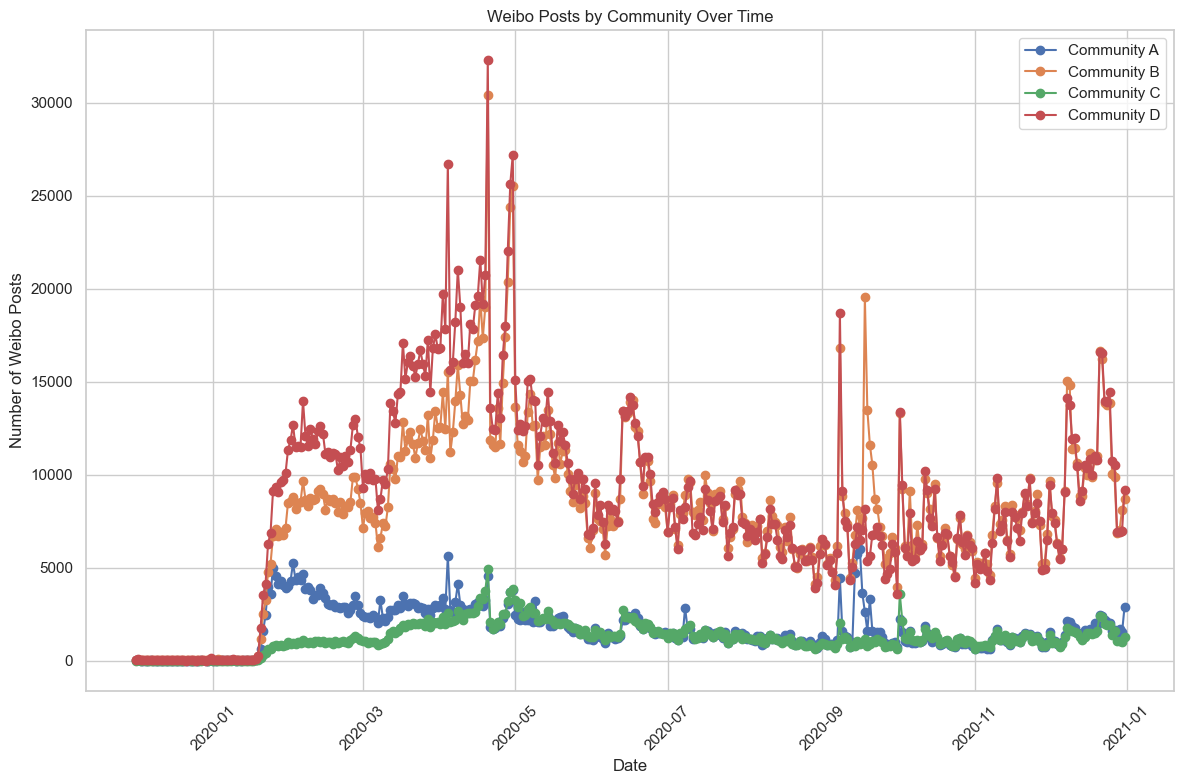

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

# time format
data_plot = all_data
data_plot['created_at'] = pd.to_datetime(data_plot['created_at'], format ='mixed')
                                        
data_plot['date'] = data_plot['created_at'].dt.date

# of tweets counted for each group, grouped by community and date
groups = data_plot.groupby(['community', 'date']).size().reset_index(name='count')

# plot the time series data
plt.figure(figsize=(12, 8))
for community in groups['community'].unique():
    community_group = groups[groups['community'] == community]
    plt.plot(community_group['date'], community_group['count'], marker='o', label=f'Community {community}')

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Number of Weibo Posts')
plt.title('Weibo Posts by Community Over Time')
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\win10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\win10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\win10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\win10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

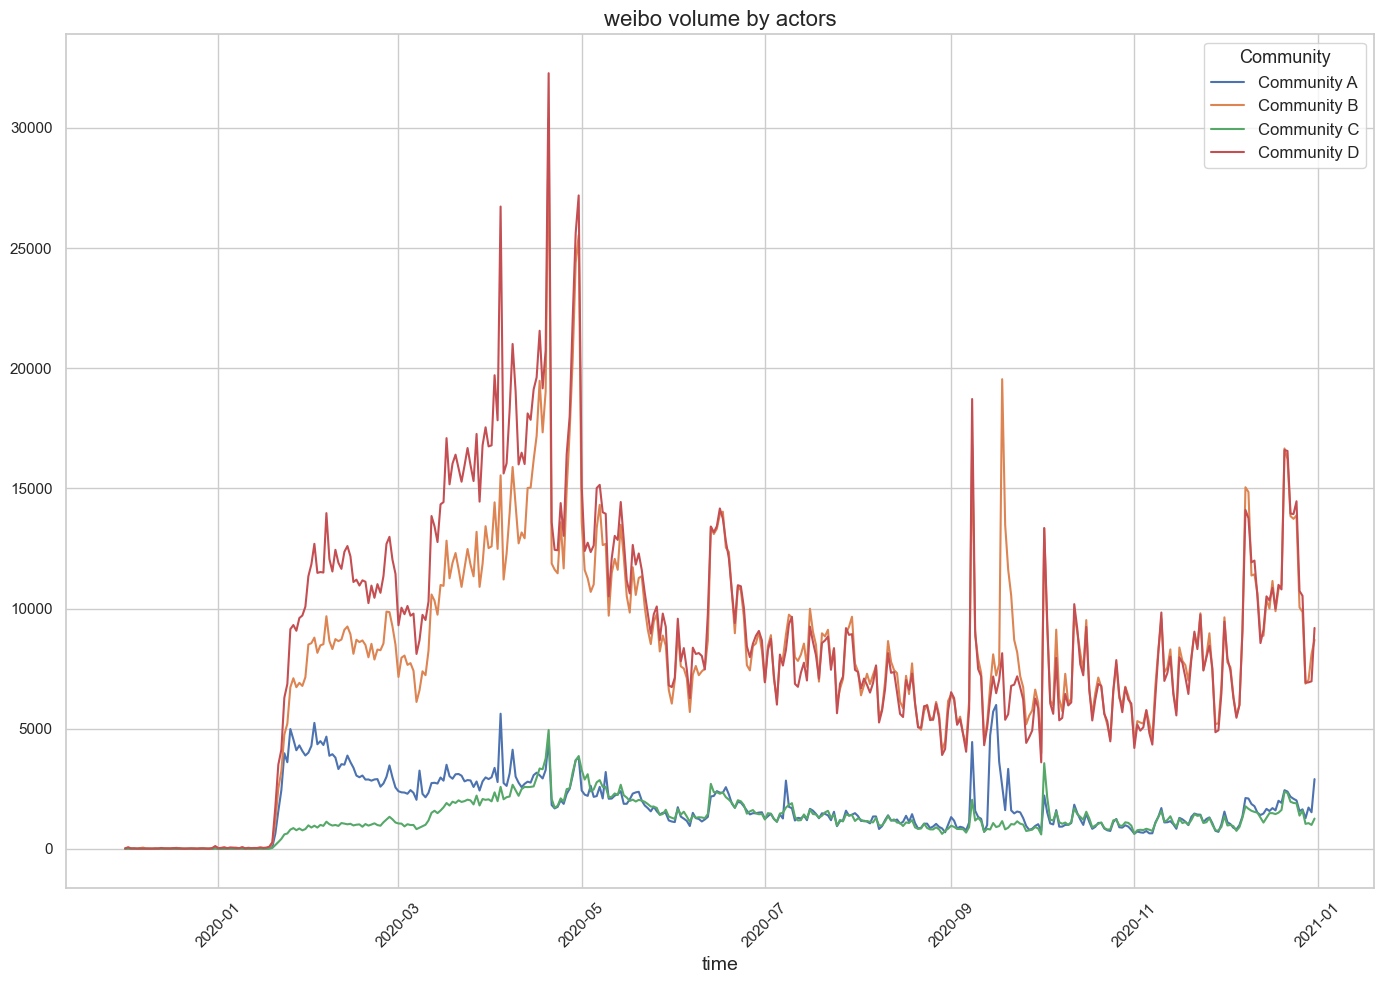

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# improve the vis style
df = all_data
df['created_at'] = pd.to_datetime(df['created_at'], errors="coerce")

df['date'] = df['created_at'].dt.date


grouped = df.groupby(['community', 'date']).size().reset_index(name='count')


plt.figure(figsize=(14, 10))

for community in grouped['community'].unique():
    community_group = grouped[grouped['community'] == community]
    sns.lineplot(x='date', y='count', data=community_group, label=f'Community {community}')


plt.xticks(rotation=45)

plt.xlabel('time', fontsize=14)
plt.ylabel('', fontsize=14)
plt.title('weibo volume by actors', fontsize=16)
plt.legend(title='Community', title_fontsize='13', fontsize='12')
plt.tight_layout()

plt.savefig('weibo_community_trends.png')

plt.show()


In [127]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

data_plot = all_data.copy()
data_plot['created_at'] = pd.to_datetime(data_plot['created_at'], errors='coerce')

data_plot['date'] = data_plot['created_at'].dt.date

groups = data_plot.groupby(['community', 'date']).size().reset_index(name='count')

groups['date'] = pd.to_datetime(groups['date'])
ts_data = groups.pivot(index='date', columns='community', values='count').fillna(0)

if not all(community in ts_data.columns for community in ['A', 'B', 'C', 'D']):
    raise ValueError("缺少一个或多个社区的数据")

# granger causality test
max_lags = 3  # lag
for community_1 in ts_data.columns:
    for community_2 in ts_data.columns:
        if community_1 != community_2:
            print(f"\nGranger Causality test results for {community_1} caused by {community_2}:")
            gc_test = grangercausalitytests(ts_data[[community_1, community_2]], max_lags, verbose=True)



Granger Causality test results for A caused by B:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8059  , p=0.3699  , df_denom=393, df_num=1
ssr based chi2 test:   chi2=0.8120  , p=0.3675  , df=1
likelihood ratio test: chi2=0.8112  , p=0.3678  , df=1
parameter F test:         F=0.8059  , p=0.3699  , df_denom=393, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.4974  , p=0.2250  , df_denom=390, df_num=2
ssr based chi2 test:   chi2=3.0333  , p=0.2194  , df=2
likelihood ratio test: chi2=3.0217  , p=0.2207  , df=2
parameter F test:         F=1.4974  , p=0.2250  , df_denom=390, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0990  , p=0.3494  , df_denom=387, df_num=3
ssr based chi2 test:   chi2=3.3566  , p=0.3398  , df=3
likelihood ratio test: chi2=3.3423  , p=0.3418  , df=3
parameter F test:         F=1.0990  , p=0.3494  , df_denom=387, df_num=3

Granger Causality test results for A cause

C:\Users\win10\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\win10\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\win10\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\win10\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\win10\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\win10\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions shou

ssr based F test:         F=5.1261  , p=0.0241  , df_denom=393, df_num=1
ssr based chi2 test:   chi2=5.1652  , p=0.0230  , df=1
likelihood ratio test: chi2=5.1318  , p=0.0235  , df=1
parameter F test:         F=5.1261  , p=0.0241  , df_denom=393, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.9099  , p=0.0557  , df_denom=390, df_num=2
ssr based chi2 test:   chi2=5.8943  , p=0.0525  , df=2
likelihood ratio test: chi2=5.8508  , p=0.0536  , df=2
parameter F test:         F=2.9099  , p=0.0557  , df_denom=390, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.2178  , p=0.0856  , df_denom=387, df_num=3
ssr based chi2 test:   chi2=6.7738  , p=0.0795  , df=3
likelihood ratio test: chi2=6.7163  , p=0.0815  , df=3
parameter F test:         F=2.2178  , p=0.0856  , df_denom=387, df_num=3

Granger Causality test results for C caused by A:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1406  , p=0.7

C:\Users\win10\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


## text analysis

In [132]:
import pandas as pd

df = all_data.copy()

# 10% data load
df_sampled = df.sample(frac=0.1, random_state=1)  # frac=0.1 

df_sampled['created_at'] = pd.to_datetime(df_sampled['created_at'], errors='coerce')
df_sampled['community'] = df_sampled['user_id'].map(user_id_to_community)
data_text_analysis = df_sampled.dropna(subset=['community'])

data_text_analysis = data_text_analysis[['community', 'content', 'created_at']]

print(data_text_analysis.head())



         community                                            content  \
60511314         D  #天津滨海新区启动全员核酸检测#从2020年11月21日上午开始，利用2-3天时间，对滨海新...   
48852941         C  【#外交部回应美国或禁用抖音微信#：为何美国会如此脆弱？】美国白宫国家贸易和制造业政策办公室...   
35530930         D  【Ted视频：免疫系统是如何运作的？】一只蚊子落在手臂上，叮咬后皮肤上鼓起一个红肿瘙痒的包。...   
23128100         B  【挖坑、植树、培土，福州连江广大党员走出户外，开展植树造林活动】突如其来的疫情让这个春天少了...   
19837895         C  #教育系统疫情防控# 【转发辟谣！#新冠肺炎最新谣言汇总#】钟南山“预测”各地解除限制时间？...   

                  created_at  
60511314 2020-11-21 11:29:00  
48852941 2020-07-14 16:34:00  
35530930 2020-04-16 17:13:00  
23128100 2020-03-13 23:26:00  
19837895 2020-03-01 11:13:00  


In [133]:
# 1. basic info
print("DataFrame基本信息：")
print(data_text_analysis.info())

# 2. NA
print("\n缺失值统计：")
print(data_text_analysis.isnull().sum())

# 3. community
print("\n社区微博数量分布：")
print(data_text_analysis['community'].value_counts())

# 4. time frame
print("\n时间范围：")
print("最早微博日期：", data_text_analysis['created_at'].min())
print("最晚微博日期：", data_text_analysis['created_at'].max())

# 5. weibo content feature
data_text_analysis['content_length'] = data_text_analysis['content'].apply(len)
print("\n微博内容长度描述统计：")
print(data_text_analysis['content_length'].describe())

DataFrame基本信息：
<class 'pandas.core.frame.DataFrame'>
Index: 778331 entries, 60511314 to 52202361
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   community   778331 non-null  object        
 1   content     778331 non-null  object        
 2   created_at  778331 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 23.8+ MB
None

缺失值统计：
community     0
content       0
created_at    0
dtype: int64

社区微博数量分布：
community
D    343270
B    315784
A     68653
C     50624
Name: count, dtype: int64

时间范围：
最早微博日期： 2019-12-01 00:31:00
最晚微博日期： 2020-12-31 23:58:27

微博内容长度描述统计：
count    778331.000000
mean        198.099309
std         172.337362
min           2.000000
25%         138.000000
50%         164.000000
75%         211.000000
max        7187.000000
Name: content_length, dtype: float64


In [141]:
import pandas as pd
import jieba
import re
from gensim import corpora, models
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# preprocessing
def preprocess_text(text):
    text = re.sub(r'\s+', '', text)  # delete space
    text = re.sub(r'[^\w#@]', '', text)  # delete punctuation and numbers
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # delete URLs
    words = jieba.cut(text)  # jieba cut
    return ' '.join(words) 

# apply preprocessing
data_text_analysis['processed_content'] = data_text_analysis['content'].apply(preprocess_text)

# Building a Document-Terminology Matrix (filter)
min_df_ratio = 0.0002 
max_df_ratio = 0.9  
vectorizer = CountVectorizer(min_df=min_df_ratio, max_df=max_df_ratio, stop_words='english')
X_counts = vectorizer.fit_transform(data_text_analysis['processed_content'])  

# TF-IDF transformer
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)



In [142]:
from sklearn.decomposition import LatentDirichletAllocation

# lda topic model
n_topics = 8  # model number
lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)

# fit
lda.fit(X_tfidf)

feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))


Topic #0:
转发 中国 美国 疫情 理由 我们 一个 没有 就是 微博
Topic #1:
病例 新增 确诊 肺炎 累计 输入 境外 无症状 死亡 感染者
Topic #2:
防控 疫情 转发 工作 口罩 复工 微博 企业 理由 健康
Topic #3:
武汉 转发 抗疫 微博 疫情 致敬 加油 战疫 视频 中国
Topic #4:
转发 微博 疫情 视频 理由 病毒 新冠 口罩 大家 香港
Topic #5:
美国 新冠 特朗普 转发 病毒 疫情 微博 感染 理由 确诊
Topic #6:
中国 美国 肖战 转发 外交部 疫情 理由 全文 中方 微博
Topic #7:
检测 疫苗 核酸 新冠 病毒 转发 人员 患者 阳性 隔离


In [149]:

# access
doc_topic_dist = lda.transform(X_tfidf)



In [151]:
# Select only the columns that begin with 'topic_' (i.e. numeric columns), then group by community and calculate the average
community_topic_distribution = data_text_analysis.filter(regex='^topic_').groupby(data_text_analysis['community']).mean()

print(community_topic_distribution)


            topic_0   topic_1   topic_2   topic_3   topic_4   topic_5  \
community                                                               
A          0.134207  0.087118  0.127348  0.211799  0.112094  0.138509   
B          0.180553  0.089443  0.132262  0.128724  0.113899  0.156089   
C          0.177137  0.088249  0.113999  0.106392  0.110749  0.200350   
D          0.157847  0.091758  0.136878  0.141940  0.113242  0.162283   

            topic_6   topic_7  
community                      
A          0.072661  0.116266  
B          0.082020  0.117011  
C          0.085588  0.117537  
D          0.078251  0.117801  


In [ ]:
from scipy.stats import pearsonr
import pandas as pd
import numpy as np
from itertools import combinations


correlations = {}
for community in data_text_analysis['community'].unique():
    community_data = data_text_analysis[data_text_analysis['community'] == community]
    pairs = combinations(community_data.index, 2)
    
    community_correlations = []
    for pair in pairs:
        corr, _ = pearsonr(community_data.loc[pair[0], 'topic_0':'topic_7'], 
                           community_data.loc[pair[1], 'topic_0':'topic_7'])
        community_correlations.append(corr)
        
    correlations[community] = community_correlations

correlation_df = pd.DataFrame.from_dict(correlations, orient='index').transpose()


C:\Users\win10\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [ ]:
from statsmodels.stats.multitest import multipletests

# BH correction
pvals_corrected = {}
for community in correlation_df.columns:
    pvals = correlation_df[community].dropna()
    _, corrected_pvals, _, _ = multipletests(pvals, alpha=0.05, method='fdr_bh')
    pvals_corrected[community] = corrected_pvals

corrected_pvals_df = pd.DataFrame.from_dict(pvals_corrected, orient='index').transpose()


In [ ]:
significantly_correlated_pairs = {}
for community in corrected_pvals_df.columns:
    significant = np.sum(corrected_pvals_df[community] < 0.05)
    total = corrected_pvals_df[community].notnull().sum()
    percentage = (significant / total) * 100 if total > 0 else 0
    significantly_correlated_pairs[community] = percentage


print(significantly_correlated_pairs)


In [ ]:

doc_topic_df = pd.DataFrame(doc_topic_dist)

doc_topic_df['Community'] = df['Community']

community_topic_dist = doc_topic_df.groupby('Community').mean()


print(community_topic_dist)


In [ ]:
# similarity
community_internal_similarity = {}

for community in community_topic_dist.index:
    community_docs = doc_topic_df[doc_topic_df['Community'] == community].drop('Community', axis=1)
    
    similarity_matrix = cosine_similarity(community_docs)
    
    np.fill_diagonal(similarity_matrix, 0)
    avg_similarity = similarity_matrix.sum() / (similarity_matrix.shape[0] * (similarity_matrix.shape[0] - 1))
    community_internal_similarity[community] = avg_similarity

for community, avg_similarity in community_internal_similarity.items():
    print(f"Community {community} internal average similarity: {avg_similarity}")
